In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import MaxNLocator

In [2]:
# load data 
df = pd.read_csv('../Data/example_data.csv', delimiter=',')
df.head()

,X1,X2,X3,X4,X5,X6,y
0,0.496714,-0.678495,0.348286,-1.980572,high,medium,0
1,-0.138264,-0.305499,0.283324,-1.054986,low,low,0
2,0.647689,-0.597381,-0.936520,-0.587028,high,high,0
3,3.523030,0.110418,0.579584,0.149669,low,low,1
4,-0.234153,1.197179,-1.490083,1.024162,low,high,0


### 5.2.2 Modelkeuze

Modelkeuze: eenvoudige beslisboom met handmatige opgestelde beslisregels met één of meerdere kenmerken

### 5.3.3 Doelvariabele

Doelvariabele: ```y```

### 5.3.4 Verkennende data-analyse

Profileringskenmerken: ```X1```, ..., ```X6```

#### 1. Missende data

In [3]:
# Check missing values in the dataframe
print("Missing values in the dataset:")
print("="*40)
missing_values = df.isnull().sum()
print(missing_values)
print()

# Calculate percentage of missing values
print("Percentage of missing values:")
print("="*40)
missing_percentage = (df.isnull().sum() / len(df)) * 100
for column, percentage in missing_percentage.items():
    if percentage > 0:
        print(f"{column}: {percentage:.2f}%")
    else:
        print(f"{column}: 0.00%")

Missing values in the dataset:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
y     0
dtype: int64

Percentage of missing values:
X1: 0.00%
X2: 0.00%
X3: 0.00%
X4: 0.00%
X5: 0.00%
X6: 0.00%
y: 0.00%


#### 2. Distributies

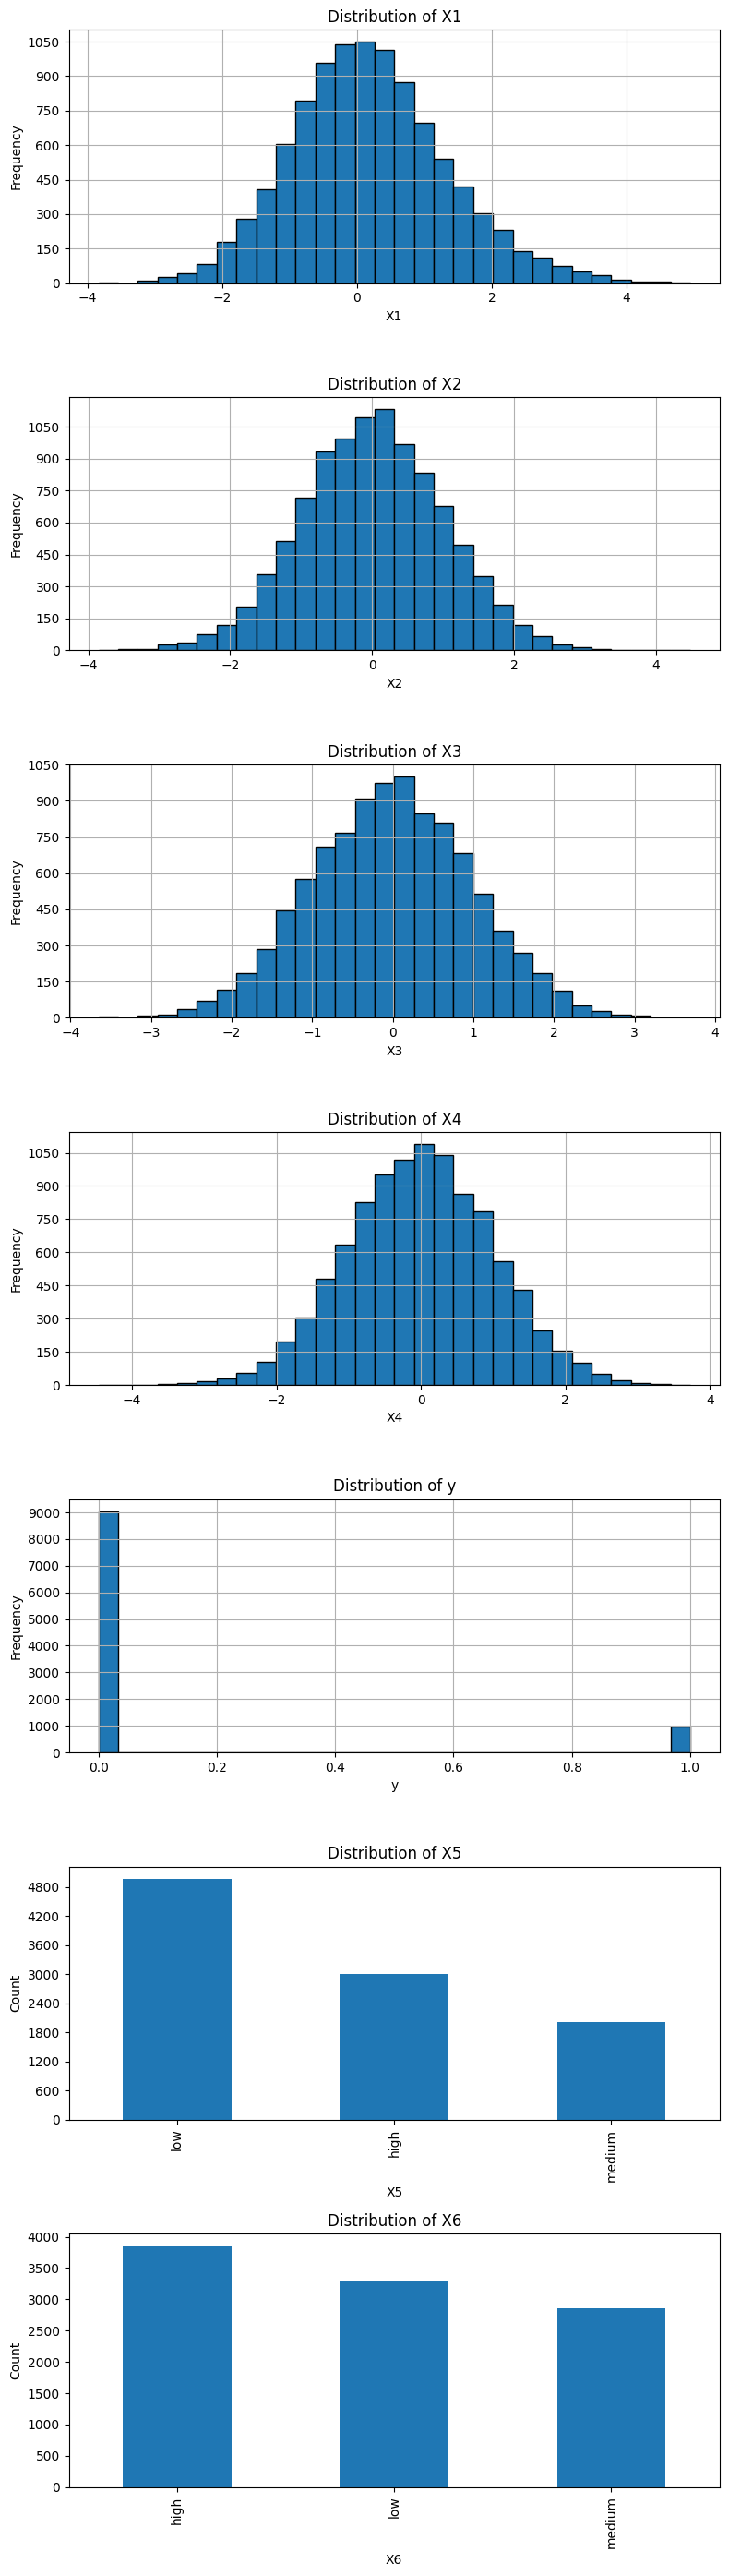

In [4]:
# Plot distributions for each column in df
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(numeric_cols) + len(categorical_cols), 1, figsize=(8, 4 * (len(numeric_cols) + len(categorical_cols))))
axes = np.atleast_1d(axes)

# Plot numeric columns
for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot categorical columns
for j, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[len(numeric_cols) + j])
    axes[len(numeric_cols) + j].set_title(f'Distribution of {col}')
    axes[len(numeric_cols) + j].set_xlabel(col)
    axes[len(numeric_cols) + j].set_ylabel('Count')
    axes[len(numeric_cols) + j].yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

#### 3. Correlaties

##### 3.1 Correlaties tussen numerieke waarden en doelvariabele

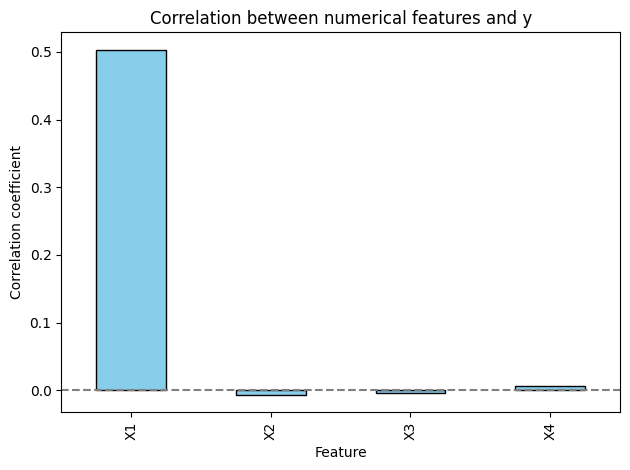

In [5]:
# Plot correlation between numerical features and y
correlations = df[numeric_cols].corr()['y'].drop('y')
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation between numerical features and y')
plt.ylabel('Correlation coefficient')
plt.xlabel('Feature')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

#### 3.2 Correlaties tussen categorische waarden en doelvariabele

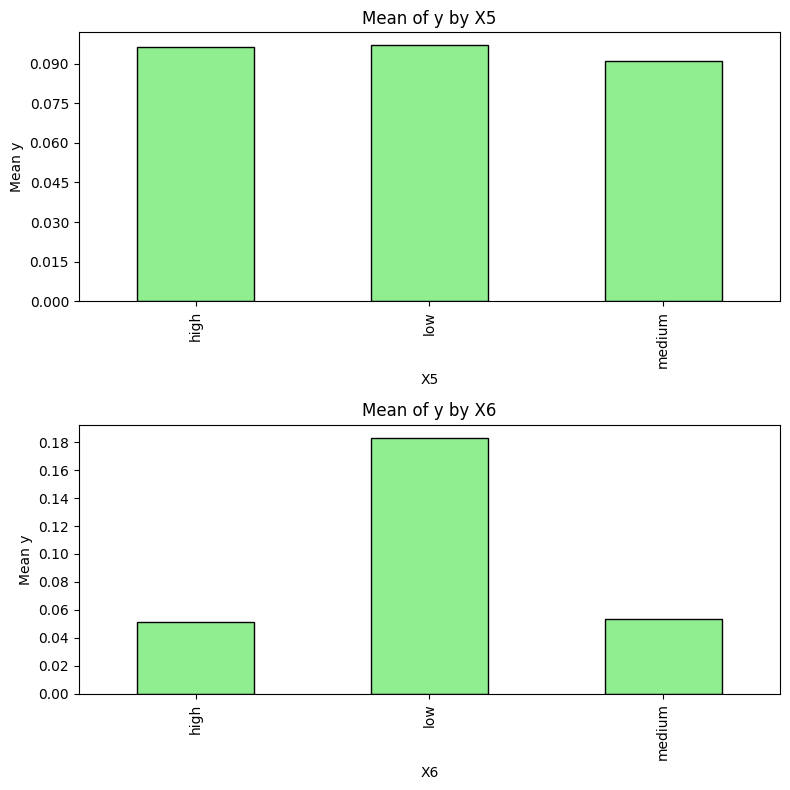

In [6]:
# Plot correlation between categorical features and y using mean target encoding
fig, axes_cat = plt.subplots(len(categorical_cols), 1, figsize=(8, 4 * len(categorical_cols)))
axes_cat = np.atleast_1d(axes_cat)

for idx, cat_col in enumerate(categorical_cols):
    means = df.groupby(cat_col)['y'].mean()
    means.plot(kind='bar', ax=axes_cat[idx], color='lightgreen', edgecolor='black')
    axes_cat[idx].set_title(f'Mean of y by {cat_col}')
    axes_cat[idx].set_xlabel(cat_col)
    axes_cat[idx].set_ylabel('Mean y')
    axes_cat[idx].yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()